## ML_All
머신러닝

1. 데이터를 불러들이기
2. feature와 label을 나누기
3. train과 test를 나누기
4. 모델 만들기
5. 모델 훈련시키기
6. 모델 예측하기
7. 예측값과 실제값을 비교하기


데이터를 나누는 일  
train과 test를 나누고, x와 y를 나눔

헤더가 없는 파일의 경우 header=None이 들어가면 처리가 된다.  
-> 첫 번째 행을 버리지 않고 쓸 수 있다.  
  
컬럼명 변경 방법
df.column = ['행 제목1', '행 제목2', '행 제목3', '행 제목4', '행 제목5']  
  
앞에 쓸 데 없는 거 붙을 때 파일 경로 뒤에, index_col=0을 붙여서 처리  
axis = 1은 세로로된 열을 지칭할 때 씀

1. Data Loading
2. Data Cleaning(결측치, outlier 제거)
    - 결측치 : ㅇf.dropna()  
    - outlier : 혼자 튀는 값  
        - 노이즈와 같음. 제거해야함.  
        - 제거는 어떻게? 산점도 참고
3. Data Scailing (01)  
    - standardScailing 등등
4. boxplot도 참고  

## ML_classification

### 라이브러리 불러오기

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

### CSV 파일 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/yoojm/Gachon/2학년 1학기/인공지능개론_이명규/Dataset/iris.csv", index_col=0)

### 데이터 확인

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 컬럼명 확인

In [4]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

### 레이블 갯수 확인 (그래프)

Text(0.5, 1.0, 'Label')

C:\Users\yoojm\anaconda3\envs\ai\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  func(*args, **kwargs)
C:\Users\yoojm\anaconda3\envs\ai\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
C:\Users\yoojm\anaconda3\envs\ai\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  func(*args, **kwargs)
C:\Users\yoojm\anaconda3\envs\ai\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*args, **kwargs)
C:\Users\yoojm\anaconda3\envs\ai\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  func(*args, **kwargs)
C:\Users\yoojm\anaconda3\envs\ai\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47492 (

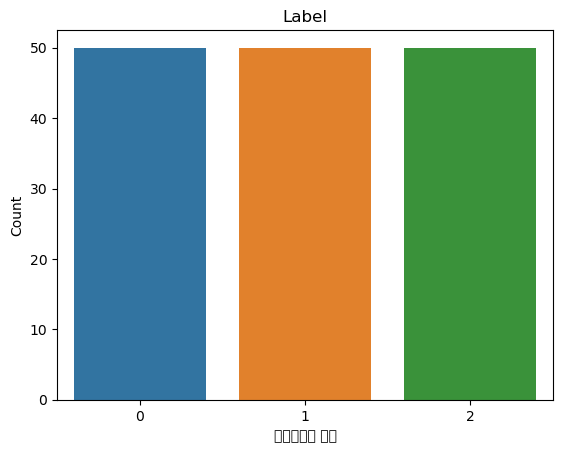

In [5]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="label")
plt.xlabel("데이터세트 이름")
plt.ylabel("Count")
plt.title("Label")

### 레이블 갯수 확인 (숫자)

In [6]:
df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

### 결측치 확인

In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

### 결측치 제거

In [8]:
df = df.dropna()
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

### 컬럼별 히스토그램 확인

C:\Users\yoojm\AppData\Local\Temp\ipykernel_17328\2839368818.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal length (cm)'], ax=ax1)
C:\Users\yoojm\anaconda3\envs\ai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yoojm\AppData\Local\Temp\ipykernel_17328\2839368818.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level functi

<Axes: xlabel='petal width (cm)', ylabel='Density'>

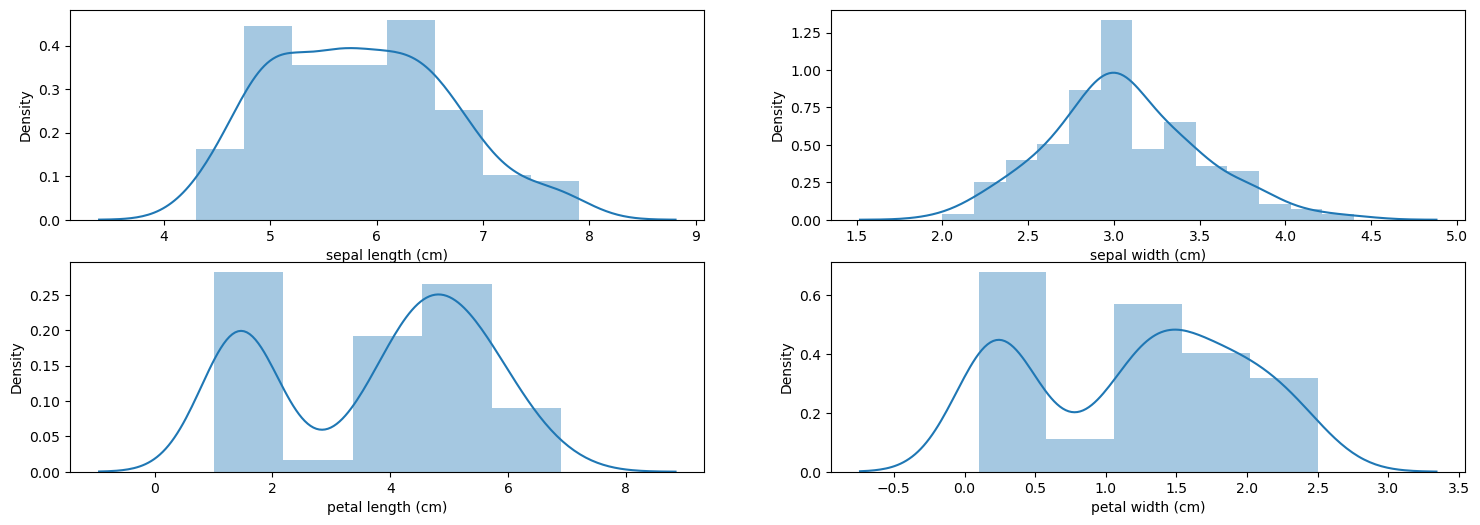

In [9]:
# 컬럼별 히스토그램 확인

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(2,2,1)
sns.distplot(df['sepal length (cm)'], ax=ax1)
ax2 = plt.subplot(2,2,2)
sns.distplot(df['sepal width (cm)'], ax=ax2)
ax3 = plt.subplot(2, 2, 3)
sns.distplot(df['petal length (cm)'], ax=ax3)
ax4 = plt.subplot(2, 2, 4)
sns.distplot(df['petal width (cm)'], ax=ax4)

### 산점도 확인

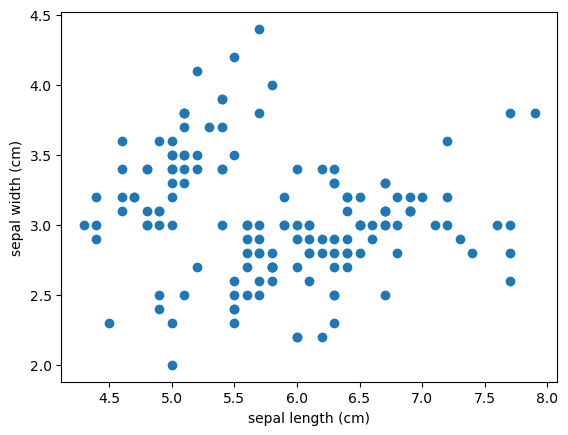

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()

### pairplot를 사용해 각 상관관계 살펴보기

C:\Users\yoojm\anaconda3\envs\ai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yoojm\anaconda3\envs\ai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yoojm\anaconda3\envs\ai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yoojm\anaconda3\envs\ai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

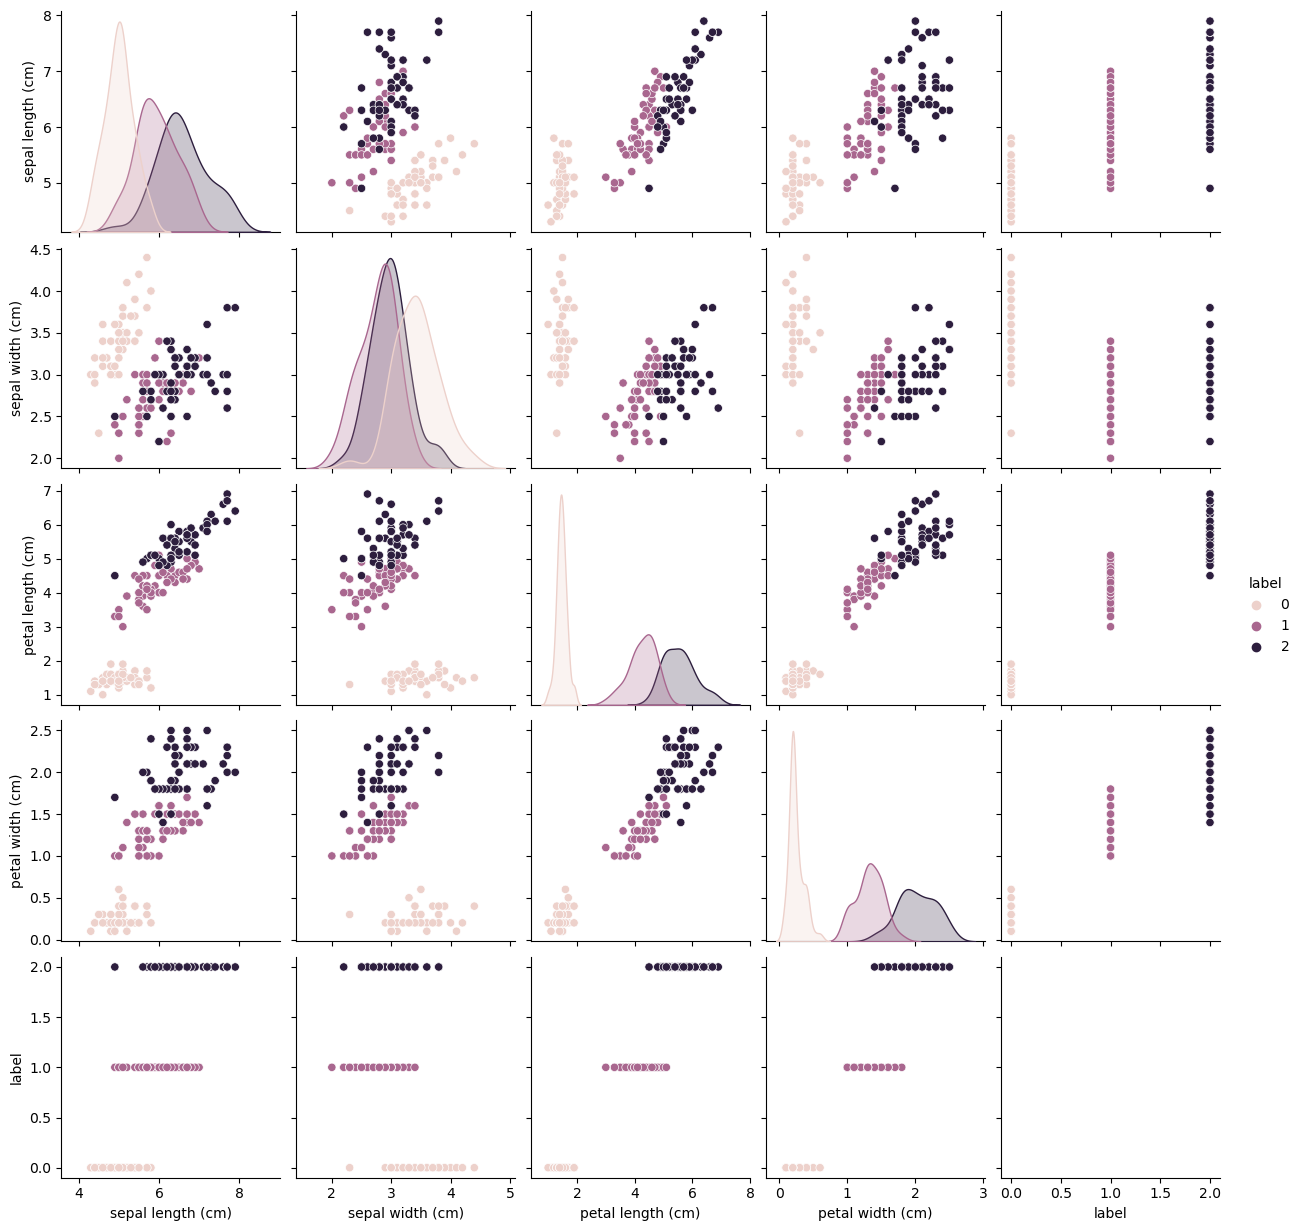

In [11]:
sns.pairplot(df,
             vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
            hue ='label')
plt.show()

### 특정 칼럼의 범위 확인 및 outlier 확인

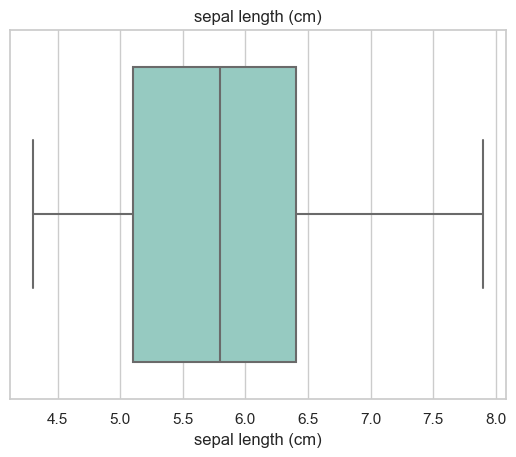

In [12]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="sepal length (cm)", data=df, palette="Set3")
plt.title("sepal length (cm)")
plt.show()

### 각 컬럼별 히스토그램 확인

C:\Users\yoojm\AppData\Local\Temp\ipykernel_17328\111277950.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


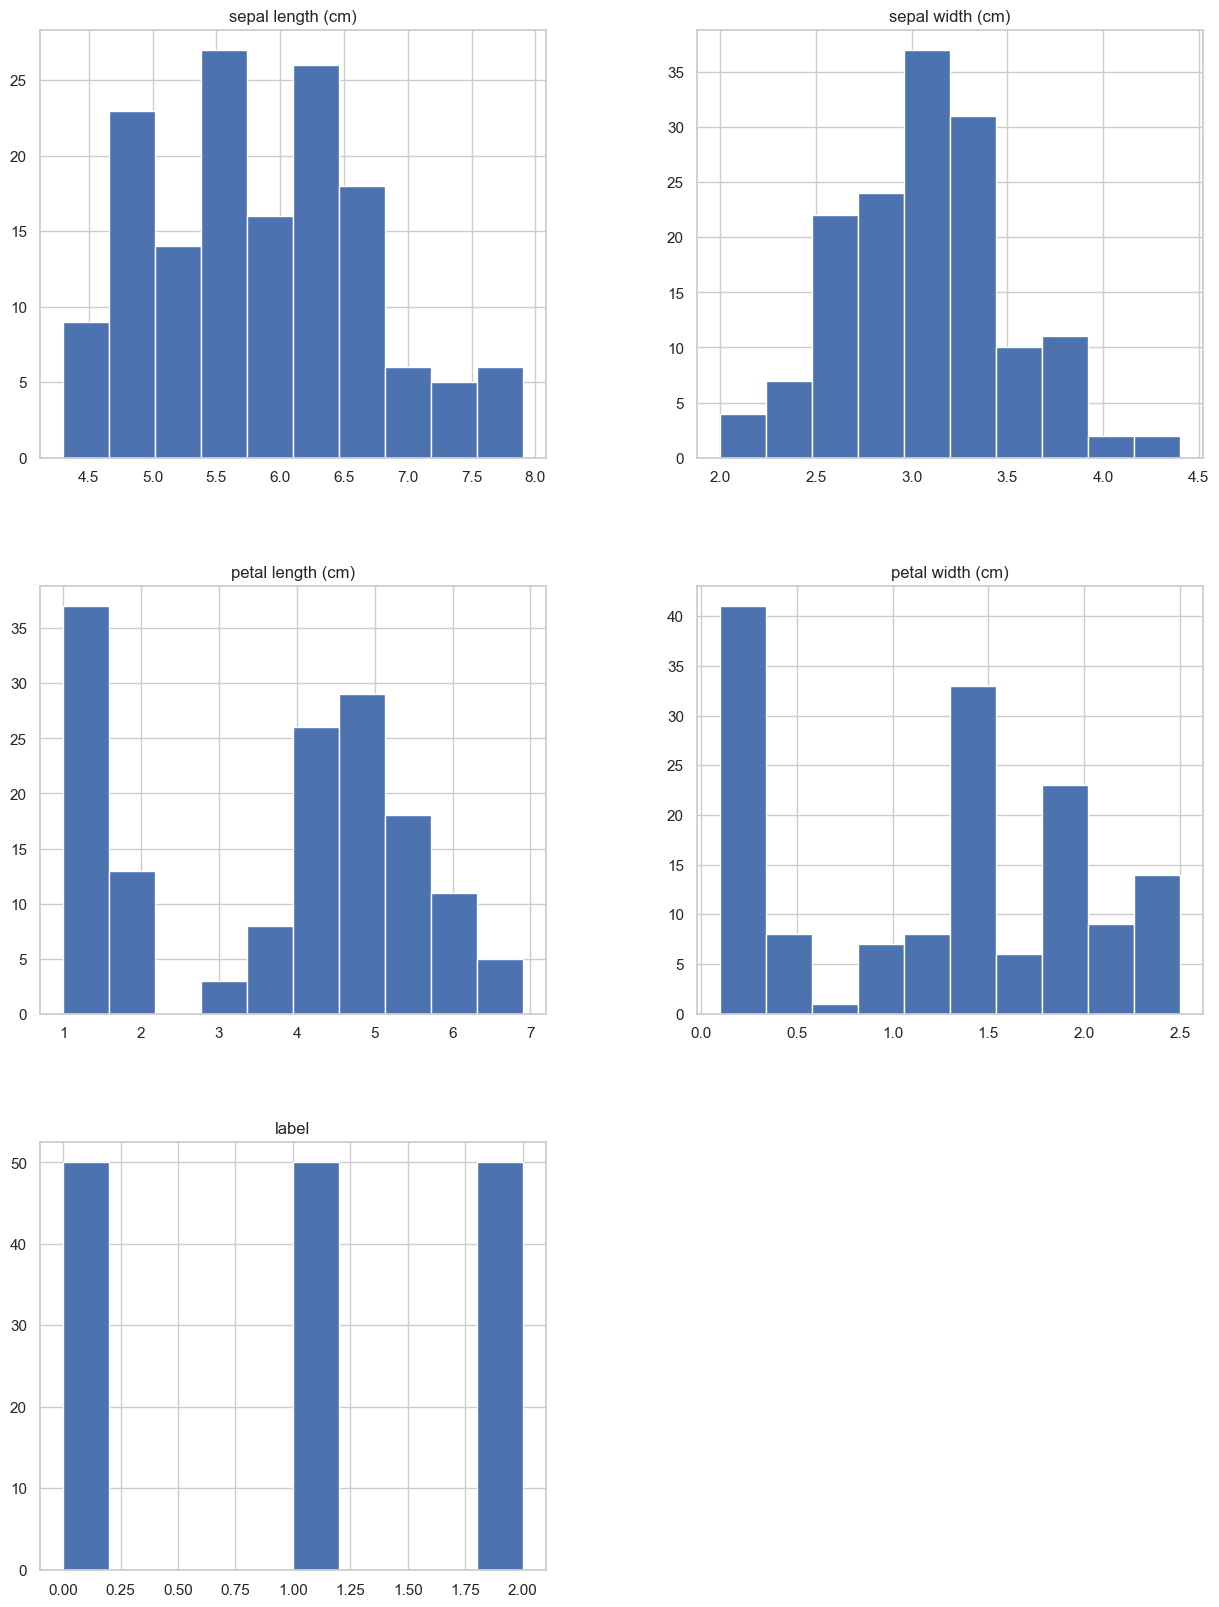

In [13]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [14]:
# feature와 label 나누기
X=df.drop('label',axis=1) # axis=1은 세로 열을 의미
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
# y를 따로 떼어 놓기
y=df['label']
y.value_counts() # y의 고유한 값과 해당 값이 나타난 횟수가 출력

label
0    50
1    50
2    50
Name: count, dtype: int64

In [17]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


###  데이터 나누기

In [18]:
# train 과 test 세트 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### SVM

In [20]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


#### Logistic Regression Classifier

In [21]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


C:\Users\yoojm\anaconda3\envs\ai\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Neural Network Classifier

In [22]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


C:\Users\yoojm\anaconda3\envs\ai\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Decision Tree Classifier

In [23]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


#### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


### ML_Regression

### 라이브러리 불러오기

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

### CSV 파일 불러오기

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/yoojm/Gachon/2학년 1학기/인공지능개론_이명규/Dataset/iris.csv", index_col=0)

### 데이터 확인

In [27]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


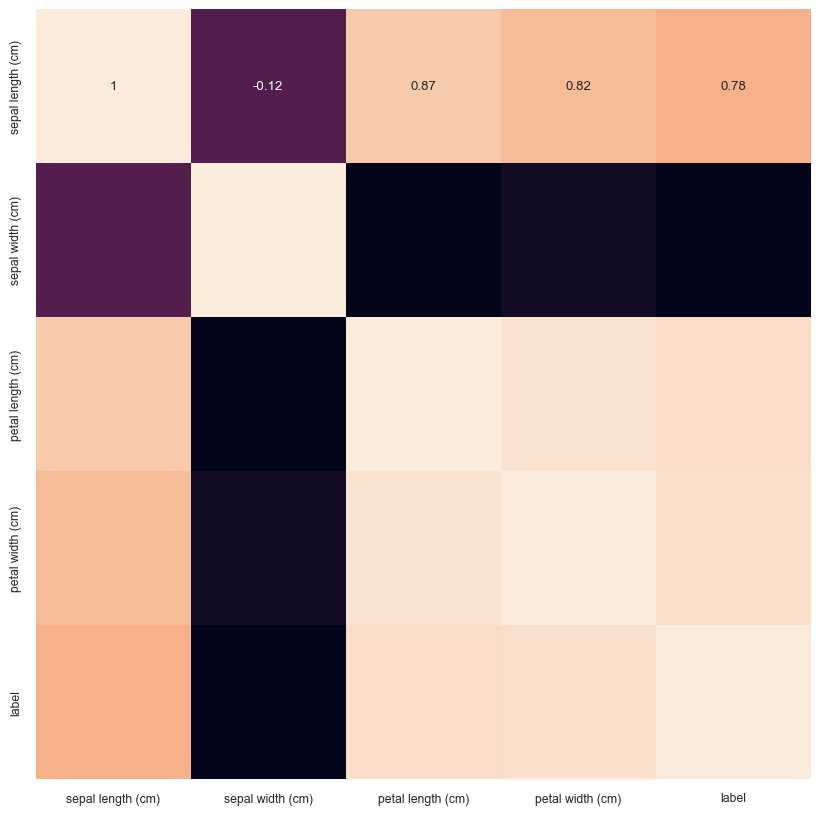

In [28]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
X = df.drop('label',axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
y = df['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [32]:
y = X['sepal width (cm)']
y.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64

In [33]:
X = X.drop(columns=['sepal width (cm)'], axis = 1)
X.head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 3) (120,)
(30, 3) (30,)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 0.09951632708276274
평균제곱근오차 0.09951632708276274
평균제곱근오차 0.09951632708276276


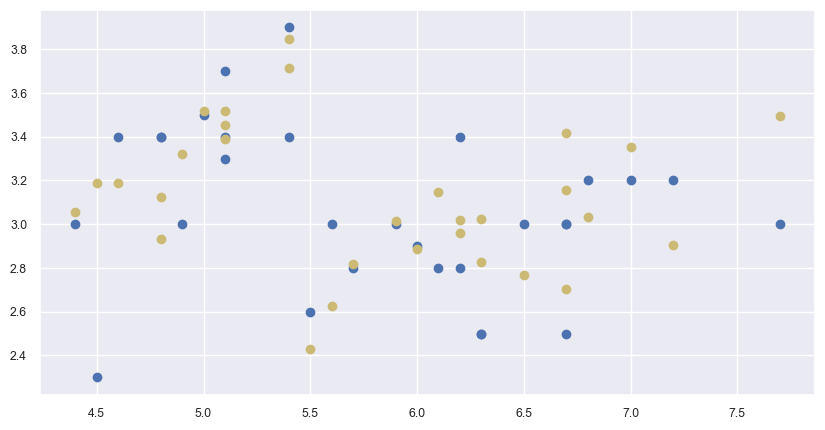

In [36]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['sepal length (cm)'], y_test, label='y_test')
plt.scatter(X_test['sepal length (cm)'], ly_preds, c='y', label='ly_preds')
# plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

### DecisionTree

In [37]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))
print(model.score(X_train, y_train))

평균제곱근오차 0.15099999999999997
0.9973138183383555


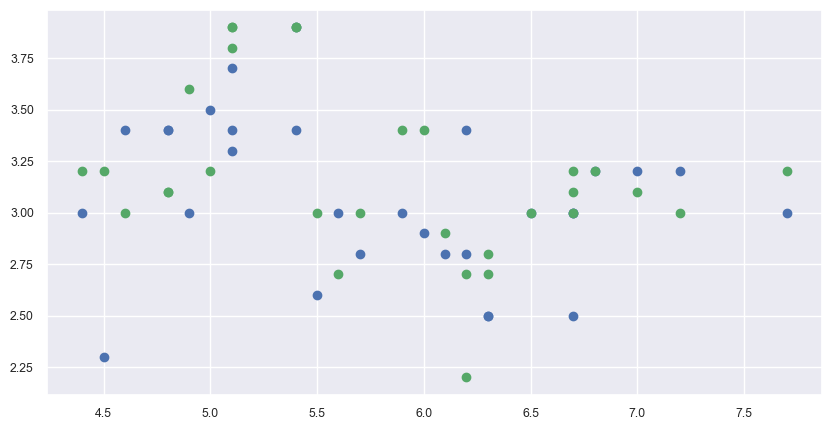

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['sepal length (cm)'], y_test, label='y_test')
plt.scatter(X_test['sepal length (cm)'], dy_preds, c='g', label='dy_preds')
plt.show()         

### RandomForest

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))
print(model.score(X_train, y_train))

평균제곱근오차 0.08582211634712779
0.928936512465174


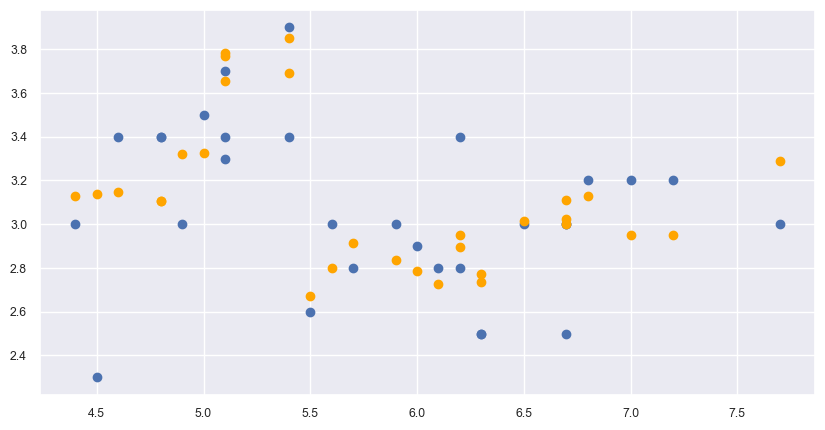

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['sepal length (cm)'], y_test, label='y_test')
plt.scatter(X_test['sepal length (cm)'], ry_preds, c='orange', label='ry_preds')

plt.show()         

### SVR

In [41]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)
print(model.score(X_train, y_train))

평균제곱근오차 0.2975065612952809
0.5479488865860527


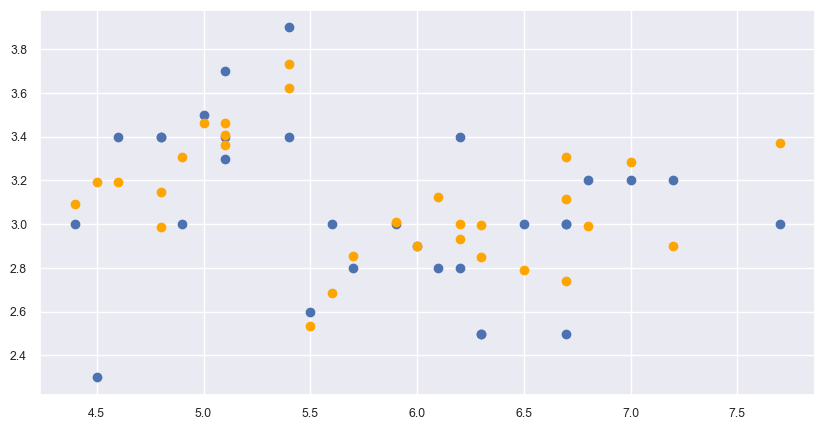

In [42]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['sepal length (cm)'], y_test, label='y_test')
plt.scatter(X_test['sepal length (cm)'], ry_preds, c='orange', label='ry_preds')

plt.show()    